# 模块7-机器学习基础-基础篇-10-从决策树到随机森林-skelarn决策树


1. 如何选择一个根节点.

    1.1 基尼系数 --> (Gini系数)
    
    1.2 信息熵   --> (ID3算法)
    
    1.3 信息增益,信息增益率 --> (C4.5算法)

## 如何处理连续数据

- 1.1 对数据指定的列进行排序
- 1.2 计算相邻两行之间的均值,记为alpha
- 1.3 计算每个alpha所对应的基尼系数
- 1.4 找到最小的基尼系数作为划分的依据

# sklearn当中的决策树

## Sklearn分类树基本使用

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [2]:
data = pd.read_excel('./data/wind.xlsx')
data.shape

(178, 14)

In [3]:
data.isna().sum()
# data.drop_duplicates() # 没有缺失值

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target_name                     0
dtype: int64

### 数据集划分"

In [4]:
from sklearn.model_selection import train_test_split
from rich import print

X, y = data.iloc[:, :-1], data.iloc[:, -1]
# 划分训练集和预测集
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1184)

#  有把训练集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=1210)

In [5]:
print(X_train.shape, X_test.shape, X_val.shape)

(113, 13)
(36, 13)
(29, 13)

### 模型训练

In [6]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
score = clf.score(X_test, y_test)
print(score)

0.8611111111111112

### 打印分类报告

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.89      0.73      0.80        11
           2       0.80      0.89      0.84         9

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36

In [16]:
import seaborn as sns
import matplotx
from sklearn.metrics import confusion_matrix

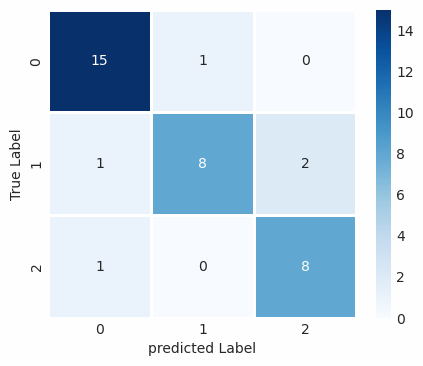

In [18]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    plt.figure(figsize=(5, 4) , dpi=100)
    sns.heatmap(cm, annot=True, cmap='Blues',
               fmt='d', edgecolor='white', lw=1,square=True)
    plt.xlabel('predicted Label')
    plt.ylabel('True Label')
plt.show()

### 决策树的可视化

In [19]:
from sklearn import tree

r = tree.export_text(clf, feature_names=list(data.iloc[:,:-1].columns))
print(r)

|--- proline <= 755.00
|   |--- flavanoids <= 1.40
|   |   |--- color_intensity <= 3.56
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.56
|   |   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- alcohol <= 13.49
|   |   |   |--- class: 1
|   |   |--- alcohol >  13.49
|   |   |   |--- class: 2
|--- proline >  755.00
|   |--- alcohol <= 12.65
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- alcohol >  12.65
|   |   |--- class: 0

In [20]:
feature_name = ['酒精', '苹果酸', '灰分', '灰的碱度', '镁',
 '总酚', '黄酮类', '非黄酮类酚',
 '原花青素', '颜色强度', '色调',
 '葡萄酒稀释后的OD280/OD315比值', '脯氨酸']

In [21]:
r = tree.export_text(clf, feature_names=feature_name)
print(r)

|--- 脯氨酸 <= 755.00
|   |--- 黄酮类 <= 1.40
|   |   |--- 颜色强度 <= 3.56
|   |   |   |--- class: 1
|   |   |--- 颜色强度 >  3.56
|   |   |   |--- class: 2
|   |--- 黄酮类 >  1.40
|   |   |--- 酒精 <= 13.49
|   |   |   |--- class: 1
|   |   |--- 酒精 >  13.49
|   |   |   |--- class: 2
|--- 脯氨酸 >  755.00
|   |--- 酒精 <= 12.65
|   |   |--- 黄酮类 <= 0.90
|   |   |   |--- class: 2
|   |   |--- 黄酮类 >  0.90
|   |   |   |--- class: 1
|   |--- 酒精 >  12.65
|   |   |--- class: 0

In [22]:
import graphviz # pip install graphviz

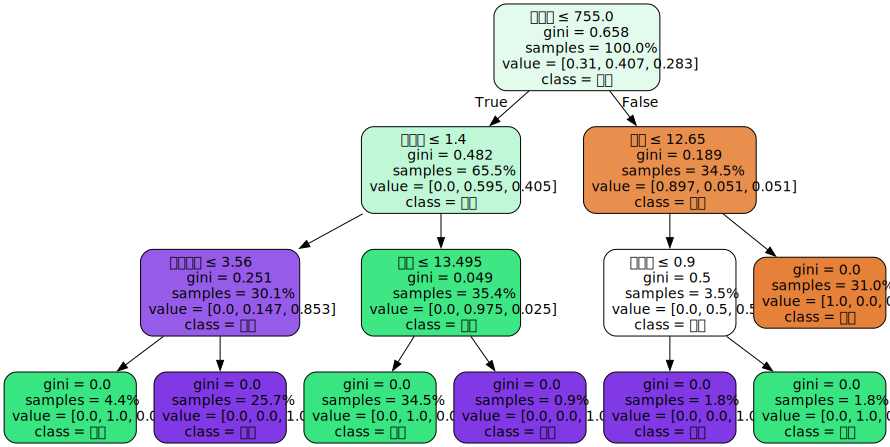

In [23]:
dot = tree.export_graphviz(clf, feature_names=feature_name, # 特征的名称列表
                class_names=['啤酒','白酒','红酒'],
                filled=True, # 是否填充
                rounded=True, # 让框变成圆角
                proportion=True, #  是否修改为类型的占比信息
                special_characters=True, # 是否显示一些特殊字符
                fontname='STsong',  # 设置中文字体
                          )
graph = graphviz.Source(dot)
graph.render('dtree',format='pdf') # 存储
graph

### 使用dtree进行可视化

In [24]:
import dtreeviz  # pip install dtreeviz

D:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


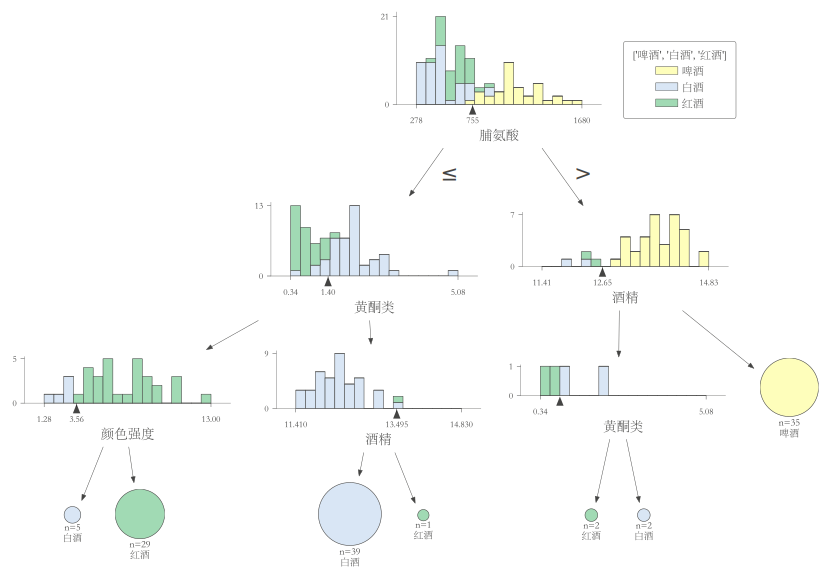

In [25]:
viz_model = dtreeviz.model(clf,                        # 导入树模型
                          X_train=X_train,             # 用于训练模型的特征
                          y_train=y_train,             # 用于训练模型的标签
                          feature_names=feature_name,  # 特征名称列表
                          target_name=['啤酒','白酒','红酒'], # 目标变量的名称
                          class_names=['啤酒','白酒','红酒'], # 最终分类的名称
                          )
viz_model.view(fontname='STsong',scale=1.5)

In [26]:
plt.rcParams['font.size'] = 16


(dot.exe:28324): Pango-WARNING **: couldn't load font "STsong Italic Not-Rotated 14", falling back to "Sans Italic Not-Rotated 14", expect ugly output.


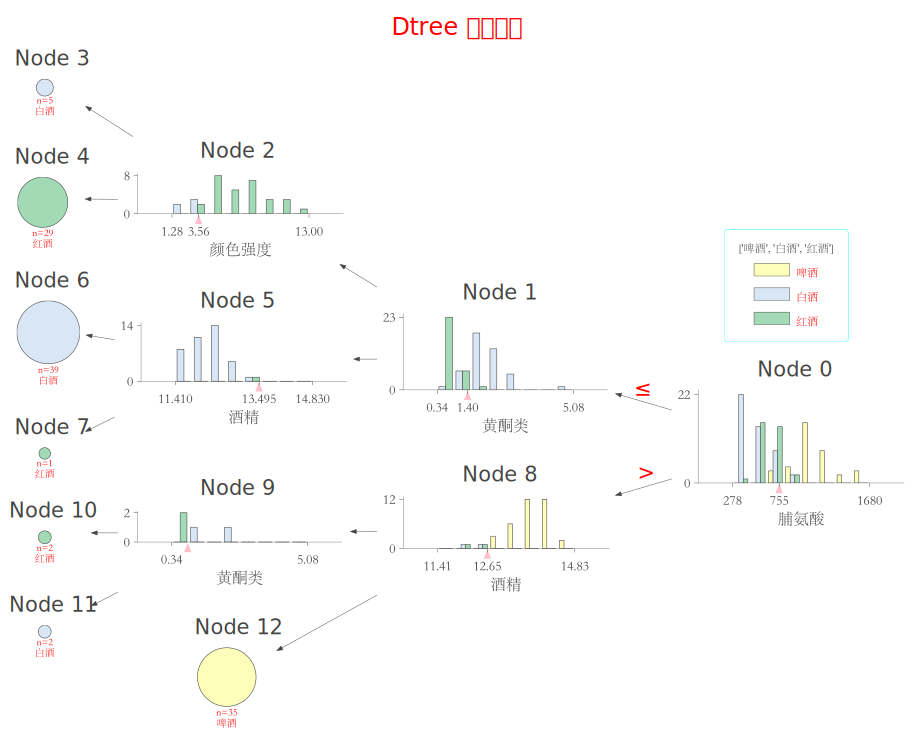

In [27]:
colors = {'title':'red',
         'legend_edge':'cyan',
          'text':'red',
         'wedge':'pink', # 指示器箭头颜色
         }

viz_model.view(fontname='STsong', # 设定显示中文字体
               scale=1.5,  # 设定缩放系数
               orientation='RL', # 可以设定显示的方向,默认是'TD'可以修改为'LR'
               label_fontsize=14, # 标签的字体大小
               ticks_fontsize=12, # 刻度字体大小
               title='Dtree 标题测试', # 设定标题
               title_fontsize=16,  # 设定的标题党字体大小.
               show_root_edge_labels=True, # 在根节点发出的边上,显示大于小于符号
               show_node_labels = True, # 在每个节点的顶部添加节点的ID
               leaftype='pie', # 叶子节点的图表类型,默认是pie,可以设置为barh
               histtype='bar', # 对于分类器的指示类型,可以设定为bar或者barstacked
               fancy=True, # 是否显示为复杂样式
               colors=colors,
              )

### 预测路径的使用

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Anaconda3\Lib\site-packages\dtreeviz\trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


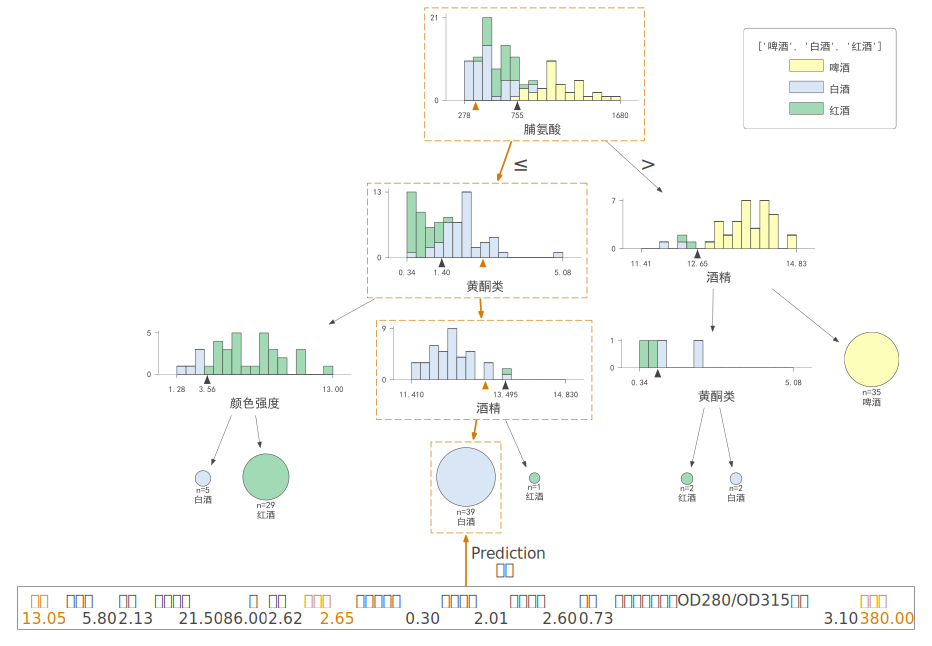

In [31]:
# 显示指定样本的预测路径
viz_model.view(x=X_train.iloc[20], fontname='Simhei',scale=1.4)

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
D:\Anaconda3\Lib\site-packages\dtreeviz\trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


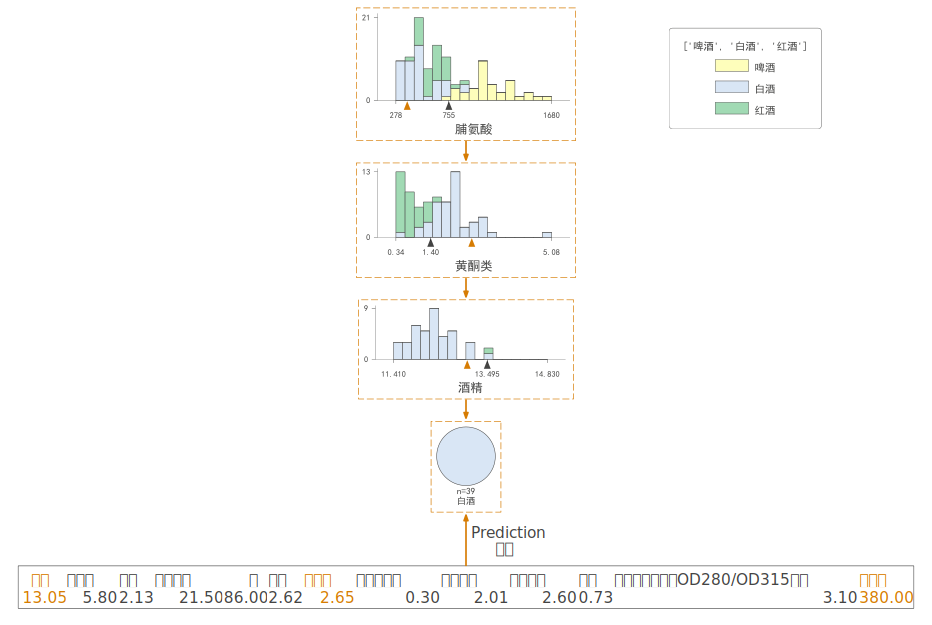

In [32]:
# 只显示特定样本的预测路径
viz_model.view(x=X_train.iloc[20], fontname='Simhei',scale=1.4,
              show_just_path=True,
              )

In [37]:
# 可以获得一个字符串表示,解释在书下运行实例时,进行的比较.
print(viz_model.explain_prediction_path(x=X_train.iloc[20]))

酒精 < 13.49
1.4 <= 黄酮类 
脯氨酸 < 755.0

D:\Anaconda3\Lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


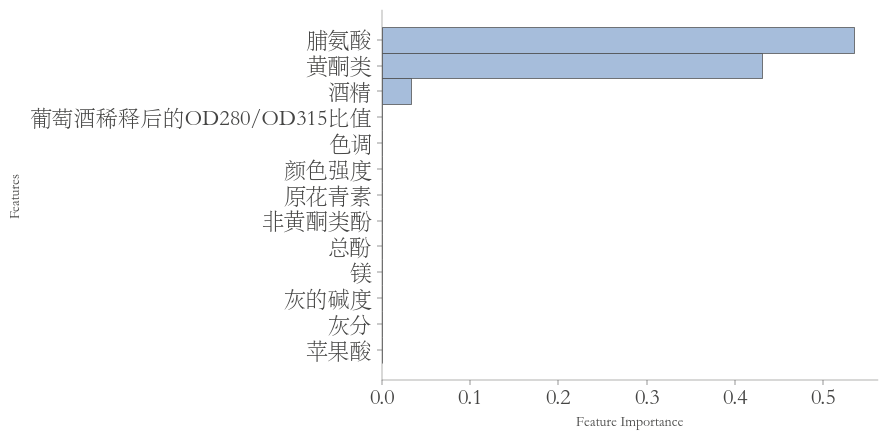

In [40]:
# 可以 查看一些比较重要的特征
viz_model.instance_feature_importance(x =X_train.iloc[20], fontname='STsong')
plt.show()

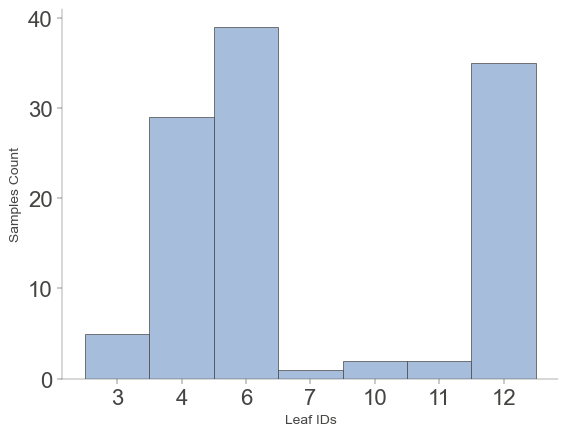

In [41]:
#查看叶子的信息

viz_model.leaf_sizes()  # 用于获取决策树中每个叶子节点的大小
plt.show()

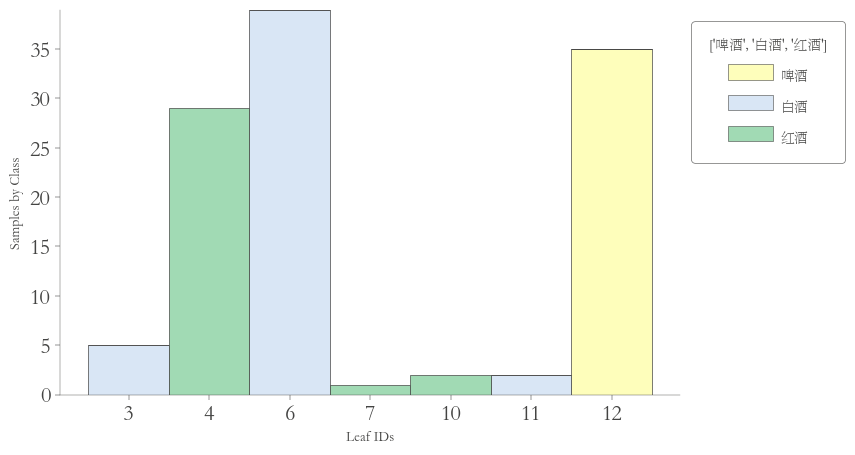

In [47]:
# 每个叶子节点的类别分布
viz_model.ctree_leaf_distributions(fontname='STsong', figsize=(8,5))
plt.show()

In [49]:
# 获取指定节点的统计信息
viz_model.node_stats(node_id=6)

,酒精,苹果酸,灰分,灰的碱度,镁,总酚,黄酮类,非黄酮类酚,原花青素,颜色强度,色调,葡萄酒稀释后的OD280/OD315比值,脯氨酸
count,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0,39.0
mean,12.263077,1.952051,2.261795,20.55641,90.205128,2.279231,2.238718,0.368462,1.64359,3.154872,1.020769,2.865128,452.410256
std,0.461691,1.023927,0.290733,2.727327,8.18593,0.47256,0.659702,0.120275,0.472811,1.04795,0.193695,0.475897,116.992289
min,11.41,0.74,1.7,16.0,78.0,1.38,1.41,0.17,0.62,1.28,0.69,1.59,278.0
25%,11.935,1.355,2.125,18.9,86.0,1.965,1.8,0.27,1.375,2.55,0.885,2.46,366.5
50%,12.29,1.66,2.24,20.7,88.0,2.22,2.11,0.37,1.61,2.9,0.97,2.96,438.0
75%,12.475,2.145,2.425,21.8,94.0,2.56,2.49,0.44,1.87,3.57,1.16,3.18,502.5
max,13.49,5.8,3.23,28.5,119.0,3.5,5.08,0.66,2.91,6.0,1.45,3.69,714.0


### 决策树的保存

In [58]:

viz = viz_model.view(fontname='STsong', # 设定显示中文字体
               scale=1.5,  # 设定缩放系数
               orientation='RL', # 可以设定显示的方向,默认是'TD'可以修改为'LR'
               label_fontsize=14, # 标签的字体大小
               ticks_fontsize=12, # 刻度字体大小
               title='Dtree 标题测试', # 设定标题
               title_fontsize=16,  # 设定的标题党字体大小.
               show_root_edge_labels=True, # 在根节点发出的边上,显示大于小于符号
               show_node_labels = True, # 在每个节点的顶部添加节点的ID
               leaftype='pie', # 叶子节点的图表类型,默认是pie,可以设置为barh
               histtype='bar', # 对于分类器的指示类型,可以设定为bar或者barstacked
               fancy=True, # 是否显示为复杂样式
               colors=colors,
              )
viz.save('dtreeviz.svg')


(dot.exe:30308): Pango-WARNING **: couldn't load font "STsong Italic Not-Rotated 14", falling back to "Sans Italic Not-Rotated 14", expect ugly output.


In [59]:
import cairosvg  #  pip install cairosvg

In [60]:
with open('./dtreeviz.svg') as f:
    svg = f.read()
cairosvg.svg2png(bytestring=svg, write_to='dtreeviz.png', scale=2, dpi=300) # 存储为png格式
cairosvg.svg2pdf(bytestring=svg, write_to='dtreeviz.pdf') # 存储为PDF

## 决策树调参

In [63]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
val_score = clf.score(X_val, y_val)

print(f"训练集上模型的准确率为: {train_score}")
print(f"测试集上模型的准确率为: {test_score}")
print(f"验证集上模型的准确率为: {val_score}")

训练集上模型的准确率为: 1.0

测试集上模型的准确率为: 0.8888888888888888

验证集上模型的准确率为: 0.9310344827586207

### 决策树调参-最大深度

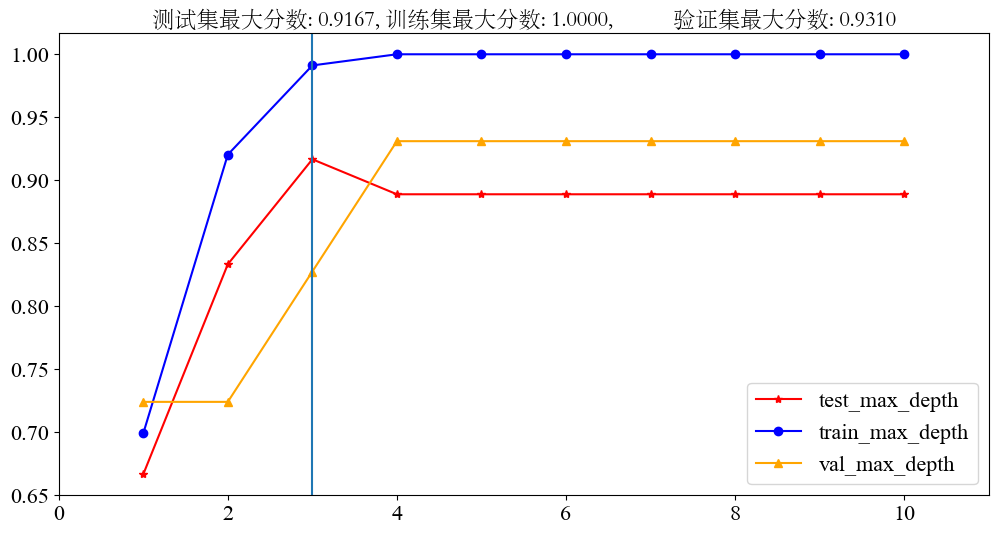

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Times New Roman'
test, train,val  = [], [], []
plt.figure(figsize=(12, 6),dpi=100)
for i in range(1,11):
    clf = tree.DecisionTreeClassifier(
        max_depth=i,  #  最大深度
        criterion='log_loss',
        random_state=220,
        splitter='best',
       ) 
    clf.fit(X_train, y_train)
    score1 = clf.score(X_train, y_train)
    score2 = clf.score(X_test, y_test)
    score3 = clf.score(X_val, y_val)
    test.append(score2)
    train.append(score1)
    val.append(score3)
plt.plot(range(1,11), test, color='red', label = 'test_max_depth', marker='*')
plt.plot(range(1,11), train, color='blue', label = 'train_max_depth', marker='o')
plt.plot(range(1,11), val, color='orange', label = 'val_max_depth', marker='^')

plt.xlim(0,11)
plt.legend()
plt.title(f"测试集最大分数: {max(test):.4f}, 训练集最大分数: {max(train):.4f}, \
          验证集最大分数: {max(val):.4f}",
         fontproperties='STsong'
         )
plt.axvline(x=3)
plt.show()

### 网格搜索Grid_search

In [74]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {
    'max_depth':  list(range(3,8)), # 最大深度3-8
    'criterion': ['gini', 'entropy', 'log_loss'],
    'ccp_alpha': [0,0.01,0.05 ,0.1, 0.5], #  ccp_alpha 的作用：它决定了剪枝的力度。
    'min_samples_leaf': list(range(1,20)), # 一个叶子节点至少要包含几个数据,
    'min_samples_split': list(range(5,20)), # 一个叶子节点至少包含多少个数据才可以继续划分
    'max_leaf_nodes': list(range(2,7)), # 最大的叶子节点数目,
    'splitter': ['best', 'random'],  # 数据划分方式
}

较大的 ccp_alpha ccp_alpha 的作用：它决定了剪枝的力度。, 值会导致更激进的剪枝，即移除更多的节点，生成更简单的树。反之，较小的 ccp_alpha 值会保留更多的节点，生成较复杂的树。

In [81]:
%time

tree = DecisionTreeClassifier()
gs = GridSearchCV(estimator=tree,
                 param_grid=param_grid,
                  n_jobs=-1,
                  verbose=2, # 日志输出程度.
                  scoring='f1_micro',
                  cv=5, # 这里是5折交叉验证,建议小点
                 )
gs.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 213750 candidates, totalling 1068750 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.01, 0.05, 0.1, 0.5],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']},
             scoring='f1_micro', verbose=2)

In [82]:
gs.best_estimator_  # 获得最好的参数列表

DecisionTreeClassifier(ccp_alpha=0, criterion='log_loss', max_depth=3,
                       max_leaf_nodes=4, min_samples_split=16,
                       splitter='random')

In [83]:
gs.best_score_  # 最好的分数

0.964822134387352

In [85]:
dt = DecisionTreeClassifier(ccp_alpha=0, criterion='log_loss', max_depth=3,
                       max_leaf_nodes=4, min_samples_split=16,
                       splitter='random')

In [86]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='log_loss', max_depth=3,
                       max_leaf_nodes=4, min_samples_split=16,
                       splitter='random')

In [87]:
from sklearn.metrics import accuracy_score

In [89]:
# 测试集评分
y_pred = dt.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.8611111111111112

In [90]:
y_pred_val = dt.predict(X_val)
accuracy_score(y_true=y_val, y_pred=y_pred_val)

0.8275862068965517

## 决策树可视化进阶-特征空间的划分

In [101]:
from sklearn.datasets import load_iris

iris = load_iris()

features = ['花萼的长度','花萼的宽度', '花瓣的长度', '花瓣的宽度']
X = iris.data
y = iris.target

1. 训练集的划分
2. 模型初步搭建
3. 模型预测
4. 模型评估
5. 评估结果若较好,可以直接可视化
6. 评估效果不好,建议 调参

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc_iris = DecisionTreeClassifier(max_depth=2,
                                 min_samples_leaf=1,
                                 random_state=666)
dtc_iris.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=666)

In [105]:
dtc_iris.score(X,y)

0.96

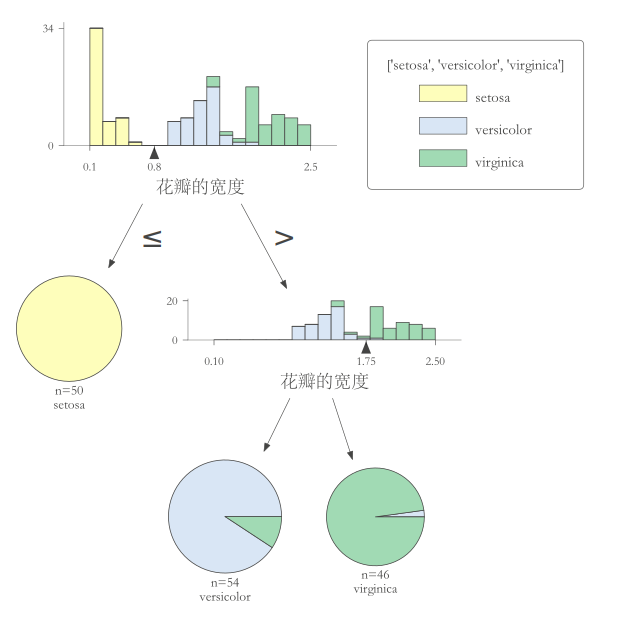

In [111]:
viz_model = dtreeviz.model(dtc_iris,
                           X_train=X,
                           y_train=y,
                           feature_names=features,
                           target_name=list(iris.target_names),
                           class_names=list(iris.target_names),
                          )
viz_model.view(fontname='STsong',scale=2)

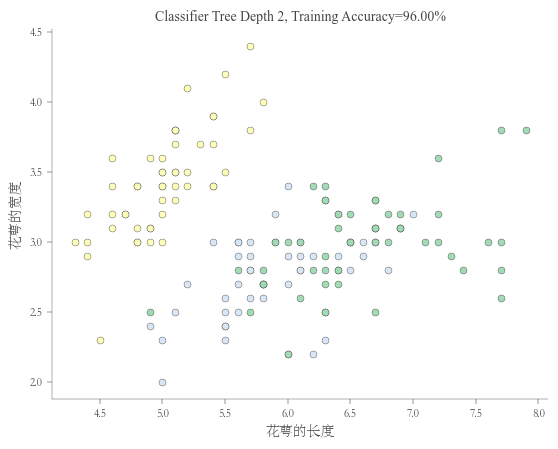

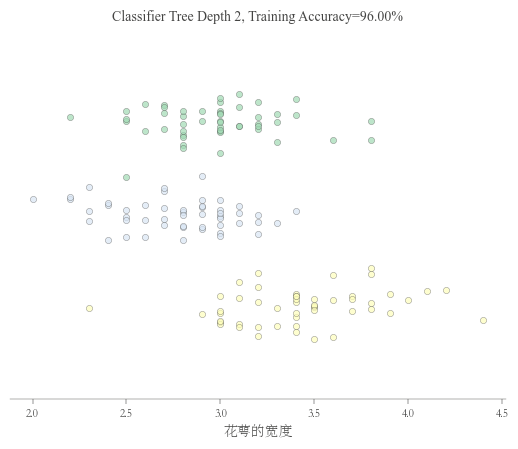

In [125]:
viz_model.ctree_feature_space(show={'splits','title'},fontname='STsong',)
viz_model.ctree_feature_space(show={'splits', 'title'},features=['花萼的宽度'],fontname='STsong',)
plt.show()

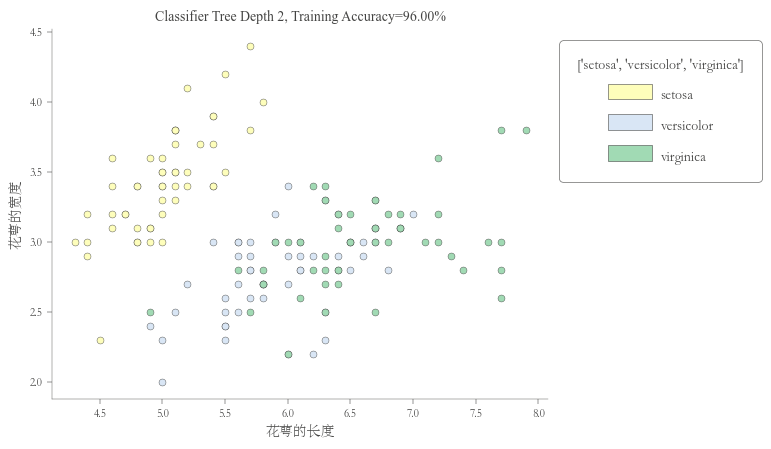

In [121]:
viz_model.ctree_feature_space(nbins = 40, gtype='barstacked', fontname='STsong')
plt.show()

### 支持的颜色定义
以下是 `COLORS` 字典中各个参数的详细说明：

1. `scatter_edge`：散点图边缘的颜色，这里设置为 `GREY`（灰色）。

2. `scatter_marker`：散点图中标记点的颜色，这里设置为 `BLUE`（蓝色）。

3. `scatter_marker_alpha`：散点图中标记点的透明度，这里设置为 0.7。

4. `class_boundary`：类别边界线的颜色，这里设置为 `GREY`（灰色）。

5. `warning`：警告信息的颜色，这里设置为 `#E9130D`（一种红色）。

6. `tile_alpha`：在决策边界中用于显示概率的正方形平铺的透明度，这里设置为 0.8。

7. `tessellation_alpha`：用于决策树特征空间划分的矩形区域的透明度，这里设置为 0.3。

8. `tessellation_alpha_3D`：3D视图中用于特征空间划分的矩形区域的透明度，这里设置为 0.5。

9. `split_line`：分割线的颜色，这里设置为 `GREY`（灰色）。

10. `mean_line`：均值线的颜色，这里设置为 `#f46d43`（一种橙色）。

11. `axis_label`：坐标轴标签的颜色，这里设置为 `GREY`（灰色）。

12. `title`：标题的颜色，这里设置为 `GREY`（灰色）。

13. `legend_title`：图例标题的颜色，这里设置为 `GREY`（灰色）。

14. `legend_edge`：图例边缘的颜色，这里设置为 `GREY`（灰色）。

15. `edge`：边缘的颜色，这里设置为 `GREY`（灰色）。

16. `color_map_min`：颜色映射的最小值对应的颜色，这里设置为 `#c7e9b4`（一种浅绿色）。

17. `color_map_max`：颜色映射的最大值对应的颜色，这里设置为 `#081d58`（一种深蓝色）。

18. `classes`：用于分类的颜色列表，这里设置为 `color_blind_friendly_colors`（一组对色盲友好的颜色）。

19. `rect_edge`：矩形边缘的颜色，这里设置为 `GREY`（灰色）。

20. `text`：文本的颜色，这里设置为 `GREY`（灰色）。

21. `highlight`：高亮显示的颜色，这里设置为 `HIGHLIGHT_COLOR`（一个预定义的高亮颜色）。

22. `wedge`：扇形图的颜色，这里设置为 `WEDGE_COLOR`（一个预定义的扇形图颜色）。

23. `text_wedge`：扇形图中文本的颜色，这里设置为 `WEDGE_COLOR`（与扇形图颜色相同）。

24. `arrow`：箭头的颜色，这里设置为 `GREY`（灰色）。

25. `node_label`：节点标签的颜色，这里设置为 `GREY`（灰色）。

26. `tick_label`：刻度标签的颜色，这里设置为 `GREY`（灰色）。

27. `leaf_label`：叶节点标签的颜色，这里设置为 `GREY`（灰色）。

28. `pie`：饼图的颜色，这里设置为 `GREY`（灰色）。

29. `hist_bar`：直方图条形的颜色，这里设置为 `LIGHTBLUE`（浅蓝色）。

30. `categorical_split_left`：分类分割左侧的颜色，这里设置为 `CATEGORICAL_SPLIT_LEFT`（一个预定义的颜色）。

31. `categorical_split_right`：分类分割右侧的颜色，这里设置为 `CATEGORICAL_SPLIT_RIGHT`（一个预定义的颜色）。

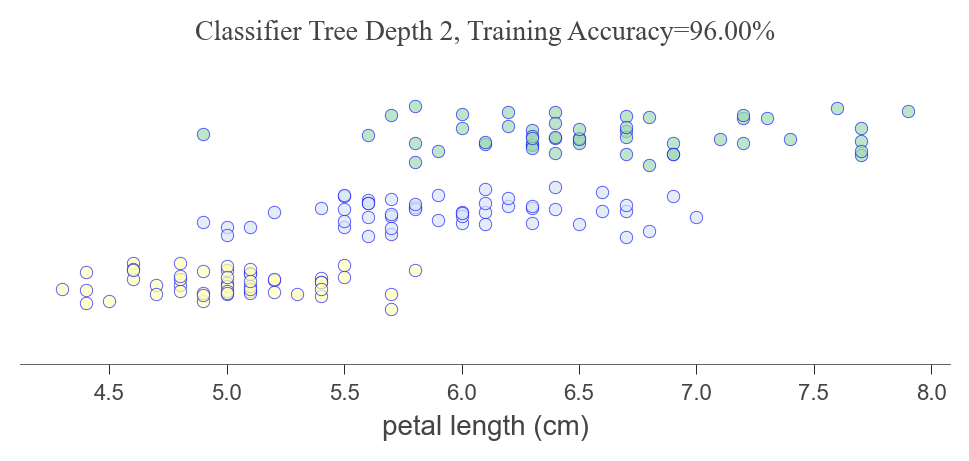

In [173]:
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
feature_c_univar = "petal length (cm)"
target_c_univar = "iris"
class_names_univar = list(iris.target_names)

dtc_iris = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
dtc_iris.fit(X, y)
colors={'scatter_edge': 'blue', 'split_line':'orange'}
fig, ax = plt.subplots(1, 1, figsize=(6,2))
m = dtreeviz.model(dtc_iris, X, y,
                   feature_names=[feature_c_univar],
                   target_name=target_c_univar,
                   class_names=class_names_univar)
m.ctree_feature_space(
            fontsize=10,
            nbins=40, gtype='strip',
            show={'splits','title'},
            colors=colors, ax=ax)

In [171]:
import dtreeviz
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import matplotlib.pyplot as plt

from IPython.display import SVG, display

%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
def show_iris(colors=None):
    iris = load_iris()
    X = iris.data
    X = X[:,2].reshape(-1,1) # petal length (cm)
    y = iris.target
    len(X), len(y)

    feature_c_univar = "petal length (cm)"
    target_c_univar = "iris"
    class_names_univar = list(iris.target_names)
    
    dtc_univar = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
    dtc_univar.fit(X, y)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,1))
    m = dtreeviz.model(dtc_univar, X, y,
                       feature_names=[feature_c_univar],
                       target_name=target_c_univar,
                       class_names=class_names_univar)
    m.ctree_feature_space(
                fontsize=10,
                nbins=40, gtype='strip',
                show={'splits','title'},
                colors=colors, ax=ax)

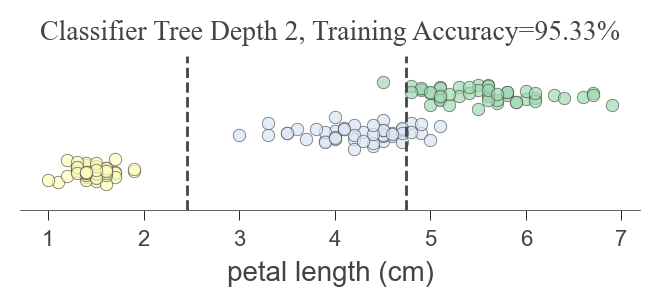

In [172]:
show_iris()

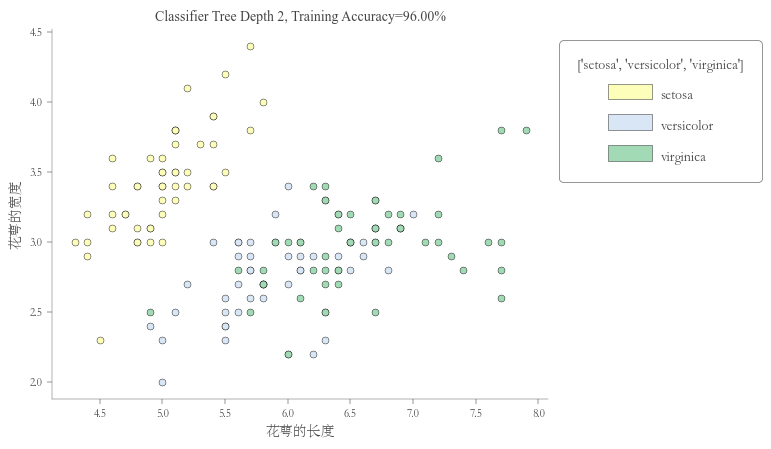

In [135]:
colors=  {
         'scatter_edge':'black',
          'scatter_marker_alpha':1,
         }

viz_model.ctree_feature_space(nbins = 40, 
                              colors=colors, 
                              gtype='barstacked', fontname='STsong')
plt.show()